<img src="https:////scontent.fhan9-1.fna.fbcdn.net/v/t39.30808-6/339122927_1347965006053141_1323654940389313527_n.jpg?_nc_cat=1&ccb=1-7&_nc_sid=5f2048&_nc_ohc=RxgK2wQBdfIAX9RQ12B&_nc_ht=scontent.fhan9-1.fna&oh=00_AfBOx5rlfgrGYgo-aGWT946hcP3U0n2WBaCcYTFM6OyZww&oe=65506ED3"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>

##  PHÂN TÍCH DỮ LIỆU PAGE [đài phát thanh](https://www.facebook.com/daiphatthanh.sound)
## Bài phân viết phân tích page được viết trong [NOTION](https://www.notion.so/Data-Analyze-Page-Facebook-6ba0209824a04832b291f084f583f6b9).

Phân tích dữ liệu: Một số câu hỏi tiềm năng để phân tích như: Đâu là bài viết
có lượt tương tác lớn nhất trong bộ dữ liệu?; Các mốc thời gian trong ngày mà
Fanpage thường xuyên đăng bài viết?; Số lượt tương tác trong các bài đăng thay
đổi như thế nào?; Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được
thu thập?; Sự tương quan giữa số lượng reactions với các trường khác như số lượng
bình luận, độ dài bài viết?; v.v. Ngoài ra, nếu có dữ liệu từ hai trang Fanpage mà
giả sử là hai trang tin tức, sự tương quan giữa nội dung của hai trang Fanpage như
thế nào?; v.v.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv(r'Data\Data_cleared_28_11.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   post_id             204 non-null    int64  
 1   post_text           204 non-null    object 
 2   time                204 non-null    object 
 3   timestamp           204 non-null    float64
 4   images_description  204 non-null    object 
 5   comments            204 non-null    int64  
 6   shares              204 non-null    int64  
 7   comments_full       204 non-null    object 
 8   reactors            204 non-null    object 
 9   reactions           204 non-null    object 
 10  reaction_count      204 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 17.7+ KB


In [20]:
df.head(3)

post_id                                          post_text  \
0  914197540072635  Dù là một nữ idol thì Jiyeon (T-ara) vẫn sẽ là...   
1  914174400074949  ĐỘ TỘC XÂY TRƯỜNG ĐƯỢC RỒI!\n\nSáng 25/11, Đoà...   
2  914151560077233  Khi bạn là rapper mainstream nhưng vẫn muốn gi...   

                  time     timestamp  \
0  2023-11-28 11:58:32  1.701148e+09   
1  2023-11-28 10:53:40  1.701144e+09   
2  2023-11-28 09:48:24  1.701140e+09   

                                  images_description  comments  shares  \
0                                                 []         4       4   
1  ["Có thể là hình ảnh về 1 người, khăn quàng cổ...        20      11   
2  ['May be an image of 1 person, frisbee, grass ...        54      44   

                                       comments_full  \
0  [{'comment_id': '1039836823726352', 'comment_u...   
1  [{'comment_id': '368548022246931', 'comment_ur...   
2  [{'comment_id': '312559144928576', 'comment_ur...   

                                            reactors  \
0                                                 []   
1  [{'name': 'Lê Ngọc Phát', 'link': 'https://fac...   
2  [{'name': 'Minh Phương', 'link': 'https://face...   

                                           reactions  reaction_count  
0    {'like': 88, 'love': 18, 'haha': 16, 'care': 1}             123  
1  {'like': 2805, 'love': 1004, 'haha': 7, 'wow':...            3845  
2  {'like': 2877, 'love': 30, 'haha': 935, 'wow':...            3864

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Phân tích lượt react theo từng ngày.

In [21]:
post_df_full1 = df
post_df_full1[['post_id','reactions']]

post_id                                          reactions
0    914197540072635    {'like': 88, 'love': 18, 'haha': 16, 'care': 1}
1    914174400074949  {'like': 2805, 'love': 1004, 'haha': 7, 'wow':...
2    914151560077233  {'like': 2877, 'love': 30, 'haha': 935, 'wow':...
3    913951943430528  {'like': 1394, 'love': 268, 'haha': 17, 'wow':...
4    913920416767014  {'like': 843, 'love': 191, 'haha': 4, 'wow': 1...
..               ...                                                ...
199  906122894213433  {'like': 6042, 'love': 2339, 'haha': 10, 'wow'...
200  906132410879148  {'like': 1722, 'love': 714, 'haha': 1, 'care':...
201  906147284210994  {'like': 1704, 'love': 322, 'haha': 4, 'care':...
202  906040377555018  {'like': 4299, 'love': 1770, 'haha': 14, 'wow'...
203  906017847557271  {'like': 1863, 'love': 426, 'haha': 5, 'wow': ...

[204 rows x 2 columns]

In [22]:
post_df_full2=post_df_full1[['time','timestamp' ,'reaction_count']]
post_df_full2

time     timestamp  reaction_count
0    2023-11-28 11:58:32  1.701148e+09             123
1    2023-11-28 10:53:40  1.701144e+09            3845
2    2023-11-28 09:48:24  1.701140e+09            3864
3    2023-11-27 23:59:52  1.701104e+09            1687
4    2023-11-27 22:46:26  1.701100e+09            1044
..                   ...           ...             ...
199  2023-11-12 20:00:49  1.699794e+09            8492
200  2023-11-12 19:30:33  1.699792e+09            2450
201  2023-11-12 19:02:54  1.699791e+09            2038
202  2023-11-12 13:43:43  1.699771e+09            6128
203  2023-11-12 12:46:22  1.699768e+09            2340

[204 rows x 3 columns]

In [23]:
dates=post_df_full2['timestamp'].to_list()
y=post_df_full2['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)


204 204
[1699767982.0, 1699771423.0, 1699790574.0, 1699792233.0, 1699794049.0, 1699795803.0, 1699797184.0, 1699801786.0, 1699805943.0, 1699844801.0, 1699849537.0, 1699852252.0, 1699853846.0, 1699867201.0, 1699875818.0, 1699879527.0, 1699880454.0, 1699887214.0, 1699925367.0, 1699933323.0, 1699940194.0, 1699945750.0, 1699952018.0, 1699963958.0, 1699970422.0, 1699971764.0, 1699973351.0, 1699974743.0, 1700015427.0, 1700022697.0, 1700025357.0, 1700037568.0, 1700038447.0, 1700042585.0, 1700047495.0, 1700049611.0, 1700051931.0, 1700053612.0, 1700055176.0, 1700058656.0, 1700060533.0, 1700061491.0, 1700063049.0, 1700064900.0, 1700065361.0, 1700101005.0, 1700102707.0, 1700116290.0, 1700126583.0, 1700130926.0, 1700133158.0, 1700134214.0, 1700135361.0, 1700137921.0, 1700140560.0, 1700144508.0, 1700152839.0, 1700153880.0, 1700194929.0, 1700197130.0, 1700204873.0, 1700218793.0, 1700223594.0, 1700229809.0, 1700231869.0, 1700234916.0, 1700279530.0, 1700281770.0, 1700286760.0, 1700299601.0, 1700301620.

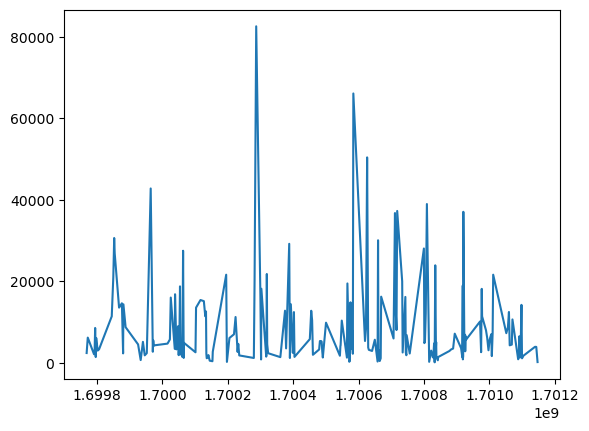

In [24]:
plt.plot(dates,y)
plt.show()


In [25]:
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)))
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )

In [26]:

# gộp các cột lại vào dataframe
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]
#'like': 2853, 'love': 2725, 'haha': 8, 'wow': 1, 'care': 79, 'sad': 4

post_text    like    love   haha  \
0    Dù là một nữ idol thì Jiyeon (T-ara) vẫn sẽ là...    88.0    18.0   16.0   
1    ĐỘ TỘC XÂY TRƯỜNG ĐƯỢC RỒI!\n\nSáng 25/11, Đoà...  2805.0  1004.0    7.0   
2    Khi bạn là rapper mainstream nhưng vẫn muốn gi...  2877.0    30.0  935.0   
3    Thái VG trở lại với Andy Vũ trong MV "Điếc", d...  1394.0   268.0   17.0   
4    Hoàng Thuỳ Linh và Đen cực tình tứ trong MV mớ...   843.0   191.0    4.0   
..                                                 ...     ...     ...    ...   
199  Mùa 1 The Masked Singer có ‘Anh Thương Em Đến ...  6042.0  2339.0   10.0   
200  Có một Việt Nam cổ kính, hoài niệm cùng chuyện...  1722.0   714.0    1.0   
201  Nguyên Hà trở lại với sản phẩm mới mang tên "N...  1704.0   322.0    4.0   
202  Chị đẹp HyunA “xả ảnh”, khoe những món quà đán...  4299.0  1770.0   14.0   
203  Bác Nguyễn Ngọc Giao là bố của Nodey - chồng S...  1863.0   426.0    5.0   

      wow   sad  angry  care  shares  comments  reaction_count  
0     NaN   NaN    NaN   1.0       4         4             123  
1     2.0   NaN    NaN  27.0      11        20            3845  
2     3.0  14.0    NaN   5.0      44        54            3864  
3     3.0   1.0    NaN   4.0      32        17            1687  
4     1.0   1.0    NaN   4.0      32        20            1044  
..    ...   ...    ...   ...     ...       ...             ...  
199   2.0  51.0    NaN  48.0     730       283            8492  
200   NaN   3.0    NaN  10.0      90        33            2450  
201   NaN   2.0    NaN   6.0      23         7            2038  
202   3.0   1.0    NaN  41.0      11        14            6128  
203  29.0   1.0    NaN  16.0       7         9            2340  

[204 rows x 11 columns]

In [27]:
for i in range(0, len(post_df_full_with_reactions['like'].values), 1):
    if pd.isna(post_df_full_with_reactions['like'].values[i]):
        post_df_full_with_reactions['like'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['love'].values[i]):
        post_df_full_with_reactions['love'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['sad'].values[i]):
        post_df_full_with_reactions['sad'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['angry'].values[i]):
        post_df_full_with_reactions['angry'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['care'].values[i]):
        post_df_full_with_reactions['care'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]

post_text    like    love   haha  \
0    Dù là một nữ idol thì Jiyeon (T-ara) vẫn sẽ là...    88.0    18.0   16.0   
1    ĐỘ TỘC XÂY TRƯỜNG ĐƯỢC RỒI!\n\nSáng 25/11, Đoà...  2805.0  1004.0    7.0   
2    Khi bạn là rapper mainstream nhưng vẫn muốn gi...  2877.0    30.0  935.0   
3    Thái VG trở lại với Andy Vũ trong MV "Điếc", d...  1394.0   268.0   17.0   
4    Hoàng Thuỳ Linh và Đen cực tình tứ trong MV mớ...   843.0   191.0    4.0   
..                                                 ...     ...     ...    ...   
199  Mùa 1 The Masked Singer có ‘Anh Thương Em Đến ...  6042.0  2339.0   10.0   
200  Có một Việt Nam cổ kính, hoài niệm cùng chuyện...  1722.0   714.0    1.0   
201  Nguyên Hà trở lại với sản phẩm mới mang tên "N...  1704.0   322.0    4.0   
202  Chị đẹp HyunA “xả ảnh”, khoe những món quà đán...  4299.0  1770.0   14.0   
203  Bác Nguyễn Ngọc Giao là bố của Nodey - chồng S...  1863.0   426.0    5.0   

      wow   sad  angry  care  shares  comments  reaction_count  
0     0.0   0.0    0.0   1.0       4         4             123  
1     2.0   0.0    0.0  27.0      11        20            3845  
2     3.0  14.0    0.0   5.0      44        54            3864  
3     3.0   1.0    0.0   4.0      32        17            1687  
4     1.0   1.0    0.0   4.0      32        20            1044  
..    ...   ...    ...   ...     ...       ...             ...  
199   2.0  51.0    0.0  48.0     730       283            8492  
200   0.0   3.0    0.0  10.0      90        33            2450  
201   0.0   2.0    0.0   6.0      23         7            2038  
202   3.0   1.0    0.0  41.0      11        14            6128  
203  29.0   1.0    0.0  16.0       7         9            2340  

[204 rows x 11 columns]

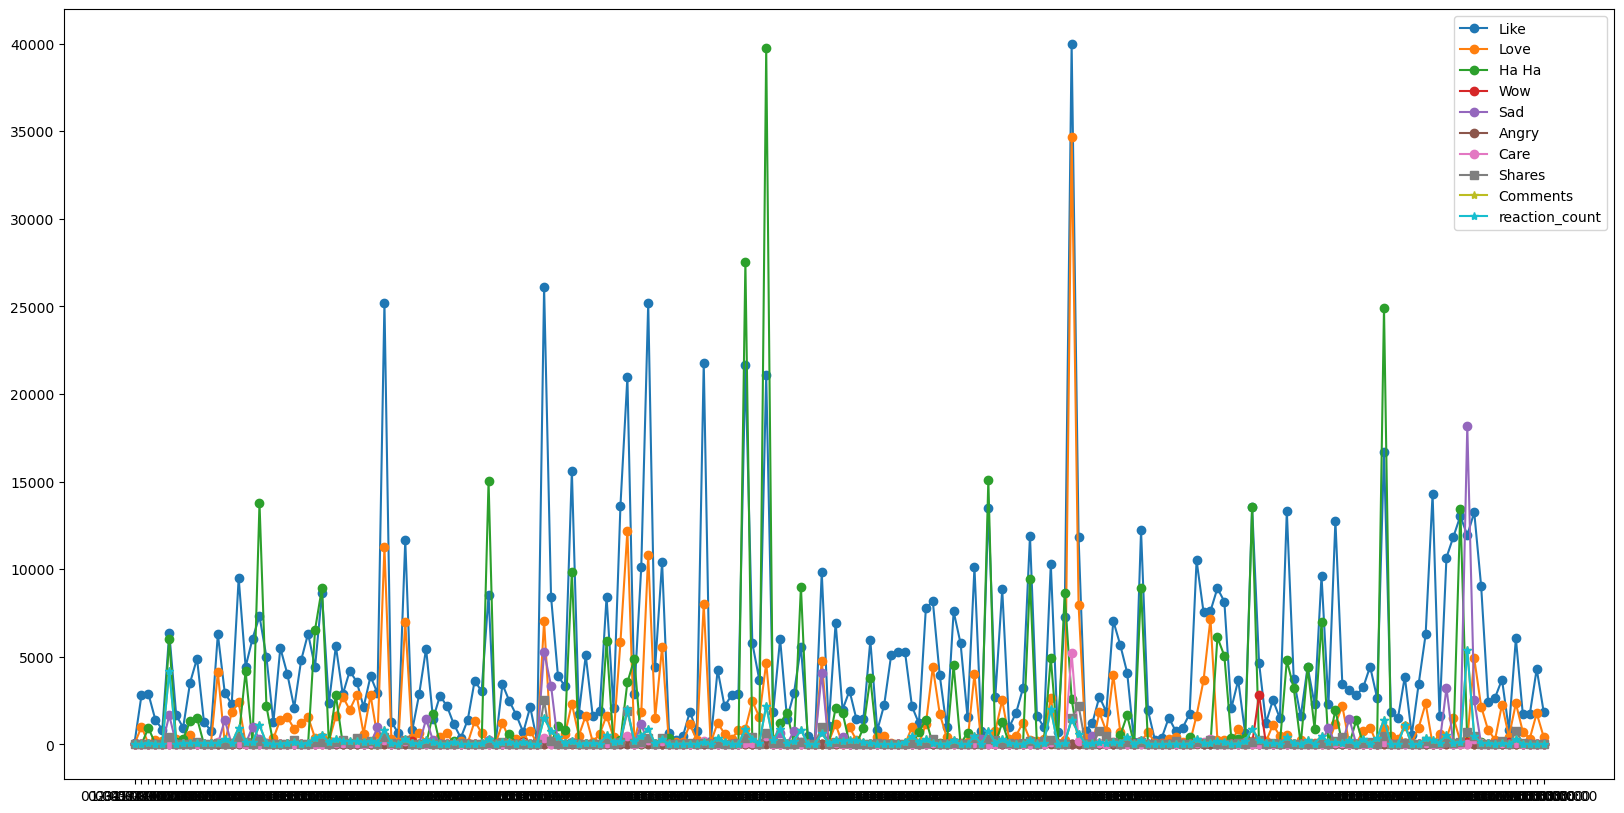

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['like'], label = "Like", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['love'], label = "Love", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['sad'], label = "Sad", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['angry'], label = "Angry", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['care'], label = "Care", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
     

In [29]:
# hiểm thị mối quan hệ Like, Love, Ha Ha, Wow, Sad, Angry, Care với cột Share
print(post_df_full_with_reactions[['like','love','haha','wow','sad','angry','care']].corrwith(post_df_full_with_reactions['shares']))
     

like     0.600260
love     0.613876
haha     0.143462
wow      0.047493
sad      0.300054
angry    0.106246
care     0.442154
dtype: float64


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

 Đâu là bài viết
có lượt tương tác lớn nhất trong bộ dữ liệu?

In [30]:
df.nlargest(1,'reaction_count')

post_id                                          post_text  \
135  909089207250135  THẦY GIÁO NHẬT “NGẠI NGÙNG” KHI LẦN ĐẦU ĐƯỢC T...   

                    time     timestamp images_description  comments  shares  \
135  2023-11-18 12:52:40  1.700287e+09                 []      1400    1500   

                                         comments_full  \
135  [{'comment_id': '1460715988059959', 'comment_u...   

                                              reactors  \
135  [{'name': 'Minh Hằng', 'link': 'https://facebo...   

                                             reactions  reaction_count  
135  {'like': 39963, 'love': 34694, 'haha': 2593, '...           82515

- ngày 11-11 có nhiều tương tác.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
Các mốc thời gian trong ngày mà Fanpage thường xuyên đăng bài viết?

Text(0.5, 1.0, 'Posting frequency by hour')

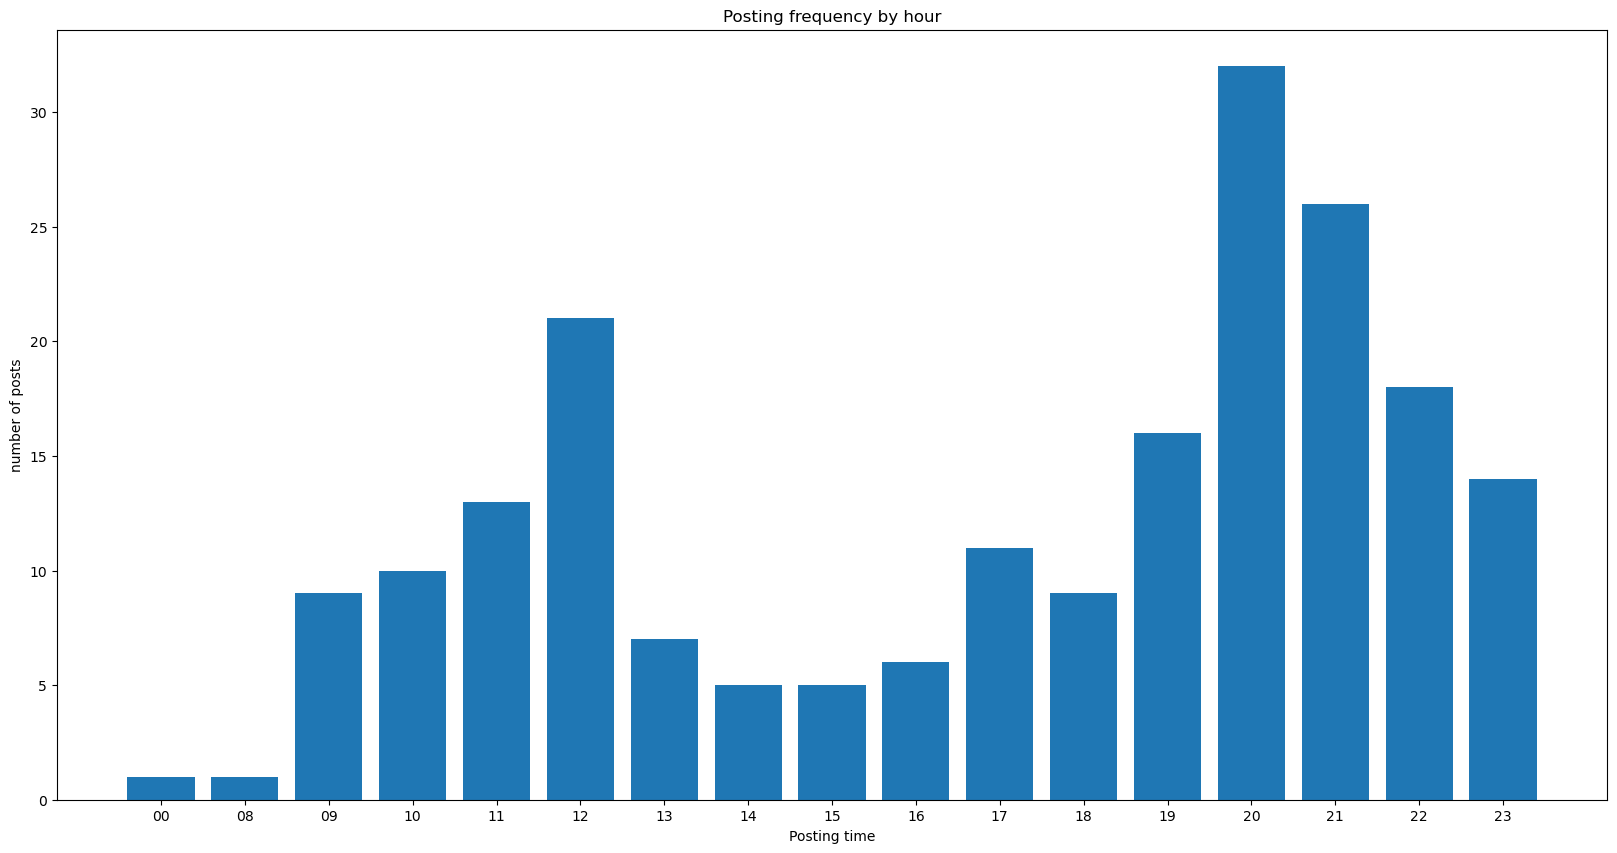

In [31]:
plt.figure(figsize=(20, 10)) 
time_posts = np.sort(post_df_full1['time'].str[11:13].unique())
number_posts = post_df_full1['time'].str[11:13].value_counts().sort_index()
plt.bar(x=time_posts,height=number_posts)
plt.xlabel('Posting time')
plt.ylabel('number of posts')
plt.title('Posting frequency by hour')

Lượng bài đăng thay đổi trong các ngày.

Text(0.5, 1.0, 'Posting frequency by hour')

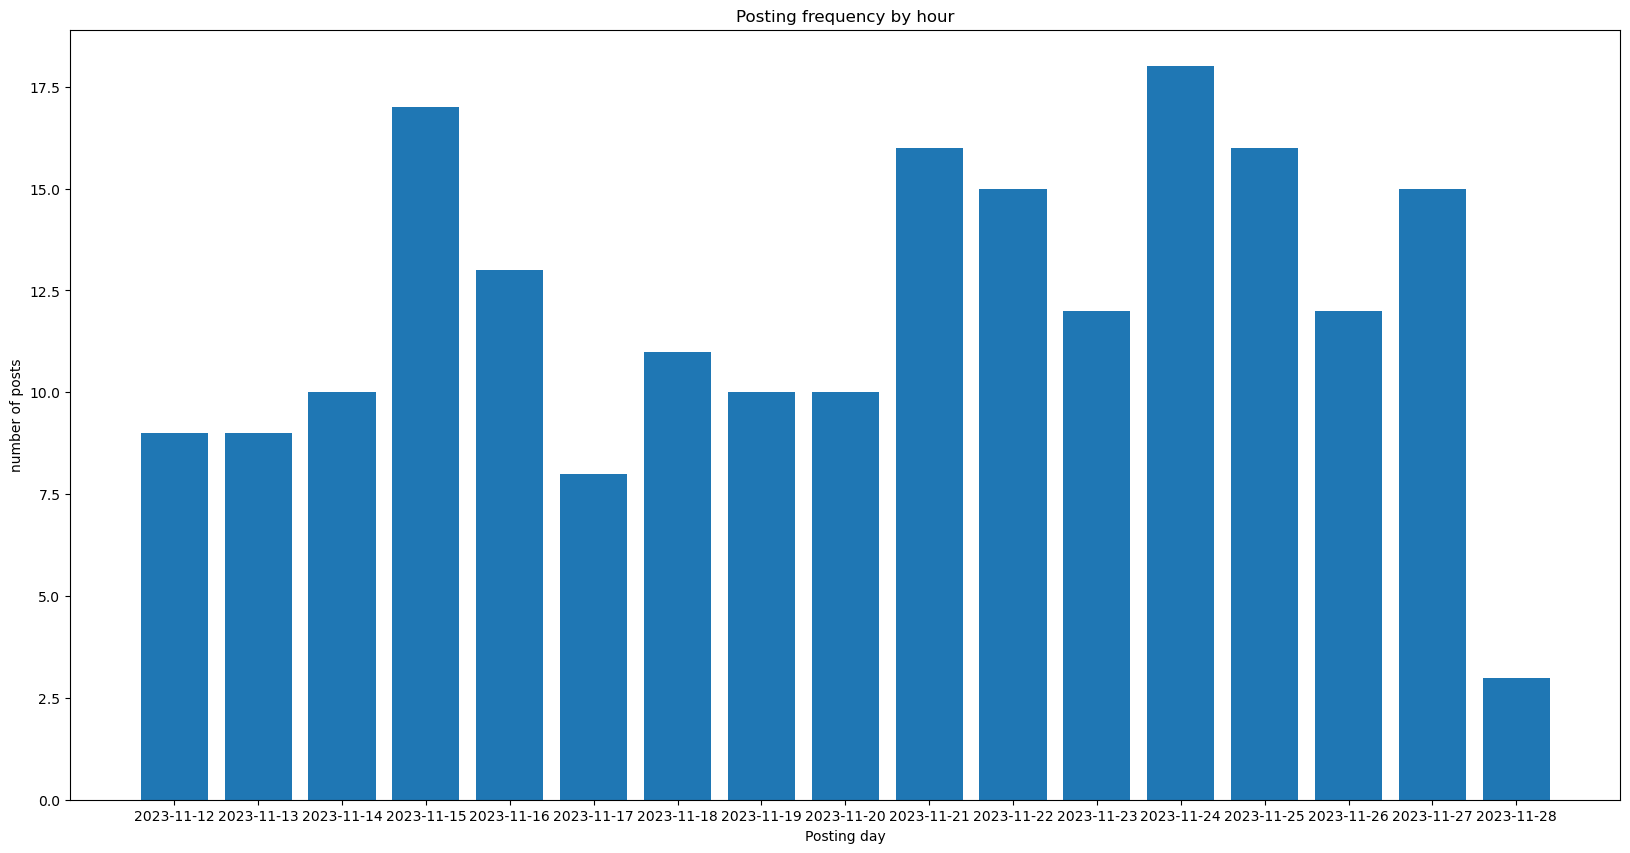

In [32]:
plt.figure(figsize=(20, 10)) 
day_posts = np.sort(post_df_full1['time'].str[0:10].unique())
number_posts = post_df_full1['time'].str[0:10].value_counts().sort_index()
plt.bar(x=day_posts,height=number_posts)
plt.xlabel('Posting day')
plt.ylabel('number of posts')
plt.title('Posting frequency by hour')

 Số lượt tương tác trong các bài đăng thay
đổi như thế nào?

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
 Đâu là các từ khóa xuất hiện nhiều nhất trong các bài đăng được
thu thập?;

In [33]:
# sao chep post_text vao mang string.
text = ""
for i in post_df_full1["post_text"]:
    text = text + i + "\n"

In [34]:
# Import thư viện WordCloud 
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

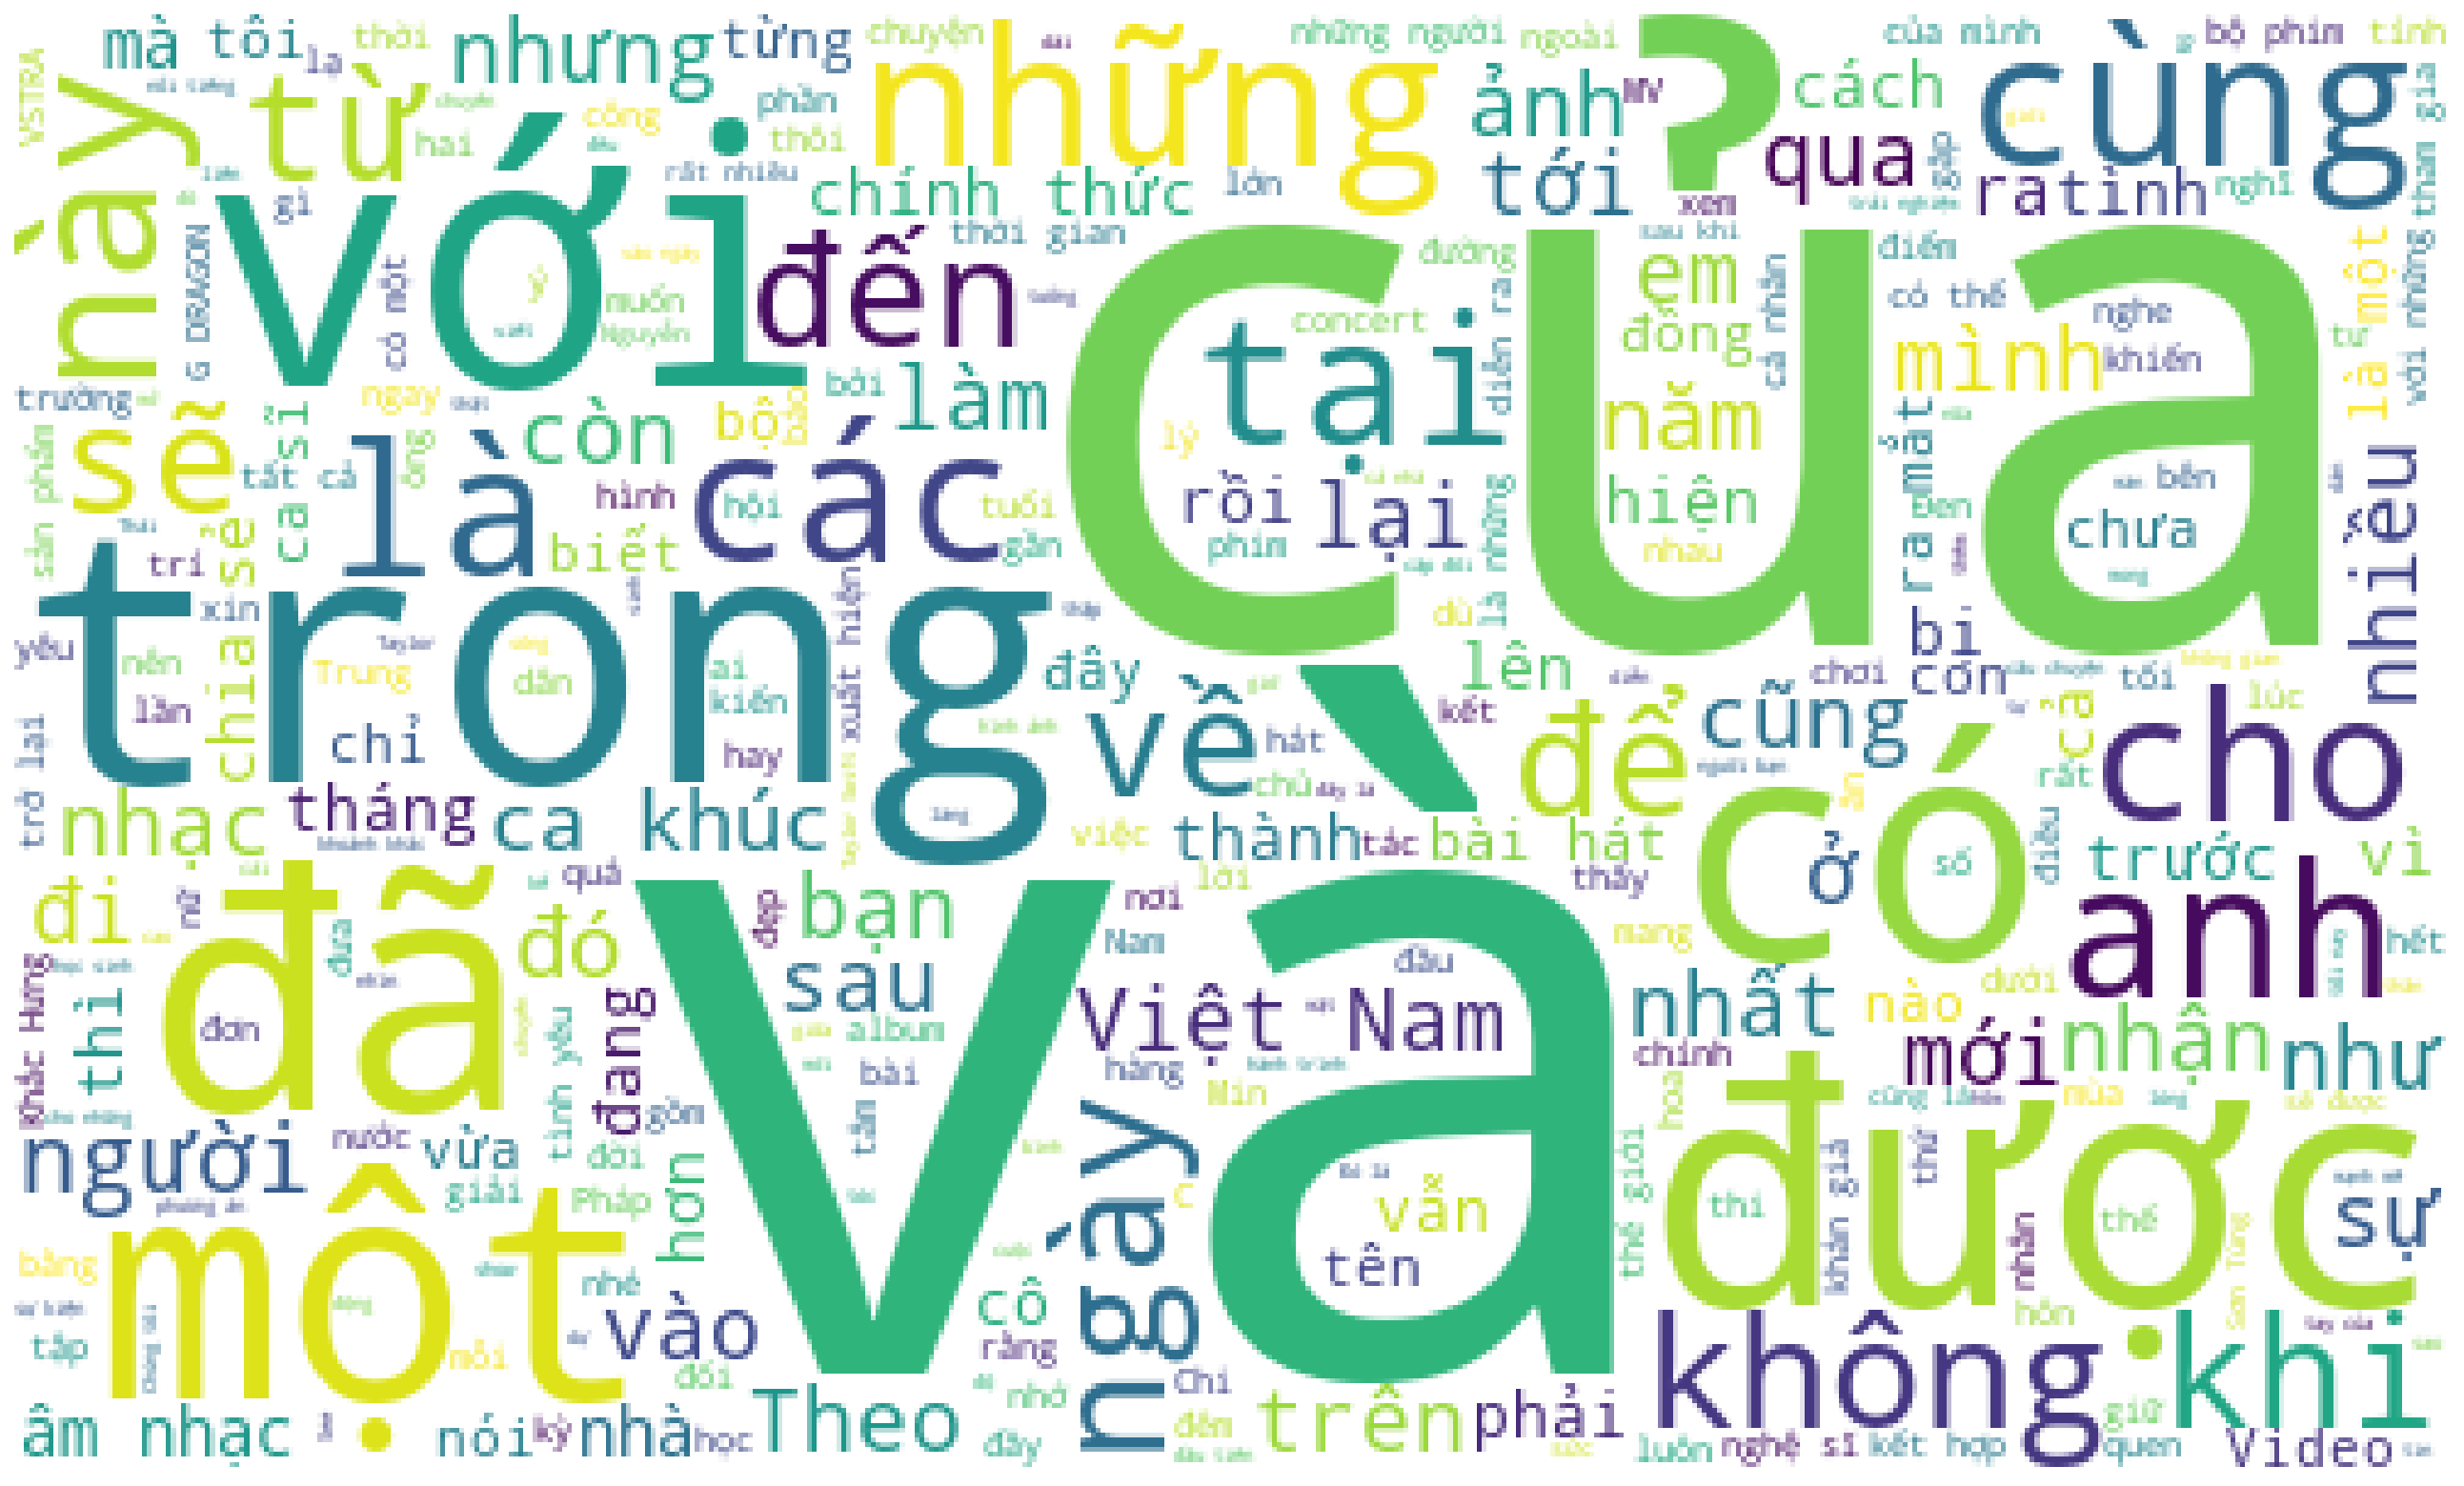

In [35]:
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Phân tích keyword.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
chon 1 bai de phan tich reactors

In [36]:
reactor = df[df['post_id']==912919293533793]
reactor

post_id                                          post_text  \
31  912919293533793  SƠN TÙNG M-TP MƯỢN SÂN KHẤU HÔM NAY ĐỂ CHÚC MỪ...   

                   time     timestamp  \
31  2023-11-25 22:52:46  1.700928e+09   

                                   images_description  comments  shares  \
31  ['Có thể là hình ảnh về 1 người và tóc mái', '...       176      66   

                                        comments_full  \
31  [{'comment_id': '760356642597061', 'comment_ur...   

                                             reactors  \
31  [{'name': 'Minh Phương', 'link': 'https://face...   

                                            reactions  reaction_count  
31  {'like': 4183, 'love': 1963, 'haha': 11, 'wow'...            6217

ideal : 
- lấy thông tin tất cả những người tương tác với page 
- phân tích kiếm tệp người tương tác với page nhiều nhất hay còn gọi là người dùng trung thành.
- tần suất tương tác  

In [37]:
df['post_id']

0      914197540072635
1      914174400074949
2      914151560077233
3      913951943430528
4      913920416767014
            ...       
199    906122894213433
200    906132410879148
201    906147284210994
202    906040377555018
203    906017847557271
Name: post_id, Length: 204, dtype: int64

In [38]:
reactor_df_full = pd.DataFrame([{'name':'','link':'','type':''}])

In [39]:
reactor_df_full

name link type
0

In [40]:
# # lấy bài đăng có post_id == 912919293533793
# reactor = df[df['post_id']==912919293533793]
# # chuyển thành list và xử lý dấu không cần thiết .
# reactor_list = reactor['reactors'].to_list()
# data_cleaned = [eval(d) for d in reactor_list]
# # chuyển thành list 1 chiều.
# data = sum(data_cleaned, [])
# # tạo dataframe lưu thông tin tất cả các người react trong bài post.
# reactor_df_full = pd.DataFrame(data) 
# reactor_df_full


In [41]:
reactor_df_full['name'].value_counts()

name
    1
Name: count, dtype: int64

In [42]:
for i in df['post_id']:
    reactor = df[df['post_id']== i]
    # chuyển thành list và xử lý dấu không cần thiết .
    reactor_list = reactor['reactors'].to_list()
    data_cleaned = [eval(d) for d in reactor_list]
    # chuyển thành list 1 chiều.
    data = sum(data_cleaned, [])
    # tạo dataframe lưu thông tin tất cả các người react trong bài post.
    temp = pd.DataFrame(data)
    reactor_df_full = pd.concat([reactor_df_full,temp],axis=0,ignore_index=True)
reactor_df_full

name                                               link  \
0                                                                            
1          Lê Ngọc Phát  https://facebook.com/profile.php?id=1000953685...   
2                    진진  https://facebook.com/profile.php?id=1000952785...   
3      Trong-Huy Nguyen  https://facebook.com/profile.php?id=1000951571...   
4           Nguyễn Vânn  https://facebook.com/profile.php?id=1000949636...   
...                 ...                                                ...   
17814      Dương Nguyễn  https://facebook.com/profile.php?id=1000901116...   
17815         Nam Hoàng  https://facebook.com/profile.php?id=1000899741...   
17816    Phan Quốc Việt  https://facebook.com/profile.php?id=1000913207...   
17817      Hoang Ky Anh  https://facebook.com/profile.php?id=1000906789...   
17818        Thuỷ Black  https://facebook.com/profile.php?id=1000907047...   

       type  
0            
1      like  
2      like  
3      love  
4      like  
...     ...  
17814  like  
17815  love  
17816  love  
17817  like  
17818  like  

[17819 rows x 3 columns]

In [43]:
reactor_df_full['name'].value_counts()

name
Phạm Ngọc Minh Quân    106
Phạm Minh Khang         88
Trần Linh               58
Lê Hiếu                 51
Linh Hoang              49
                      ... 
Nguyen Hoai Anh          1
Vũ Gấm                   1
Ng.T.Thanh Hiền          1
Trần Mỹ Duyên            1
Phan Quốc Việt           1
Name: count, Length: 9818, dtype: int64

In [44]:
import pandas as pd
comment_full = df['comments_full']
arr = np.array(comment_full)
arr

array(["[{'comment_id': '1039836823726352', 'comment_url': 'https://facebook.com/1039836823726352', 'commenter_id': '100059002444433', 'commenter_url': 'https://facebook.com/antunhien.1604?eav=AfanawJba8cuOt2So5Y2E7XPOi_W_pjXtdE5gc_8oIeYjkqN4ecd9MyiyQRDub4xHgw&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'An Tư Nhiên', 'commenter_meta': None, 'comment_text': 'Trông bả nhí nhảnh như này mừng ghê, xưa tui xem cái vid bả đi tham vấn tâm lí thấy thương deso. Aygooo chị bé vất vả ruii', 'comment_time': datetime.datetime(2023, 11, 27, 23, 52), 'comment_image': None, 'comment_reactors': [], 'comment_reactions': None, 'comment_reaction_count': None, 'replies': []}, {'comment_id': '739622634673748', 'comment_url': 'https://facebook.com/739622634673748', 'commenter_id': '100012884269073', 'commenter_url': 'https://facebook.com/elkipu.2510?eav=Afb9k7mMSqDpOKTVPnQFsyx2SKljq7MiNhDNlLpMtew1xXlslMlaYLcRVw1ENu-3L1A&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Phụng Kim Phụ